In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist=input_data.read_data_sets('D:\marlabs\Datasets\mnist',one_hot=True)

Extracting D:\marlabs\Datasets\mnist\train-images-idx3-ubyte.gz
Extracting D:\marlabs\Datasets\mnist\train-labels-idx1-ubyte.gz
Extracting D:\marlabs\Datasets\mnist\t10k-images-idx3-ubyte.gz
Extracting D:\marlabs\Datasets\mnist\t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [6]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
mnist.train.images.shape#784 means x^2

(55000, 784)

In [9]:
784**(0.5)

28.0

In [10]:
mnist.train.num_examples

55000

In [11]:
mnist.test.num_examples

10000

In [12]:
mnist.validation.num_examples

5000

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
mnist.train.images[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
mnist.train.images[1].shape

(784,)

In [17]:
mnist.train.images[1].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

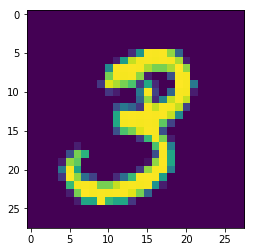

In [18]:
plt.imshow(mnist.train.images[1].reshape(28,28))

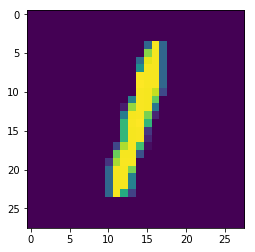

In [19]:
plt.imshow(mnist.train.images[23].reshape(28,28))

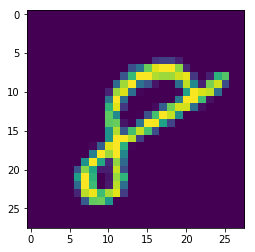

In [22]:
plt.imshow(mnist.train.images[54999].reshape(28,28))

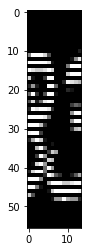

In [24]:
plt.imshow(mnist.train.images[1].reshape(56,14),cmap='gist_gray')

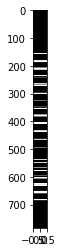

In [27]:
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=0.02)

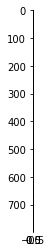

In [26]:
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray')

In [28]:
mnist.train.images.max()

1.0

In [31]:
#Modelling
x=tf.placeholder(tf.float32,shape=[None,784])#input 0,input1 x1,x2....

In [32]:
x

<tf.Tensor 'Placeholder_1:0' shape=(?, 784) dtype=float32>

In [33]:
#Weight
w=tf.Variable(tf.zeros([784,10]))#numbers from 0 to 9

In [34]:
#Bias
b=tf.Variable(tf.zeros([10]))

In [41]:
#ouput
y=tf.matmul(x,w)+b

In [35]:
#Loss Optimize function
y_true=tf.placeholder(tf.float32,shape=[None,10])


In [38]:
mnist.train.labels[0]#7

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [40]:
mnist.train.labels[56]#5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [43]:
#CrossEntropy-actual error
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))

In [44]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [45]:
train=optimizer.minimize(cross_entropy)

In [46]:
#session
init=tf.global_variables_initializer()

In [47]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        batch_x,batch_y=mnist.train.next_batch(100)
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
        
    matches=tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    
    acc=tf.reduce_mean(tf.cast(matches,tf.float32))
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))
    

0.9171


In [ ]:
#estimator method 
